In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the dataset
df = pd.read_csv('1000 datasets.csv')

In [4]:
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

Dataset Shape: (1009, 12)

Columns: ['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover', 'Pressure (millibars)', 'Daily Summary']

Data Types:
 Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)        int64
Visibility (km)             float64
Loud Cover                    int64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

Missing Values:
 Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)      

In [5]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], errors='coerce')

In [6]:
# Handle missing values
df['Precip Type'].fillna('None', inplace=True)
numeric_cols = ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 
               'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 
               'Pressure (millibars)']

for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

In [7]:
df.drop(columns=['Loud Cover'], inplace=True, errors='ignore')

In [8]:
# Feature Engineering
df['Hour'] = df['Formatted Date'].dt.hour
df['Day'] = df['Formatted Date'].dt.day
df['Month'] = df['Formatted Date'].dt.month
df['Year'] = df['Formatted Date'].dt.year
df['DayOfWeek'] = df['Formatted Date'].dt.dayofweek


In [9]:
print("Basic Statistics:")
print(df[numeric_cols].describe())


Basic Statistics:
       Temperature (C)  Apparent Temperature (C)     Humidity  \
count      1009.000000               1009.000000  1009.000000   
mean         15.112829                 14.747583     0.731338   
std           6.198042                  6.804634     0.174085   
min           0.955556                 -0.866667     0.320000   
25%          10.533333                 10.533333     0.600000   
50%          14.977778                 14.977778     0.750000   
75%          18.877778                 18.877778     0.890000   
max          32.544444                 33.177778     1.000000   

       Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  \
count        1009.000000             1009.000000      1009.000000   
mean           10.441257              196.685828        10.946341   
std             6.388051               96.138744         3.383129   
min             0.000000                0.000000         0.289800   
25%             5.474000              140.000000   

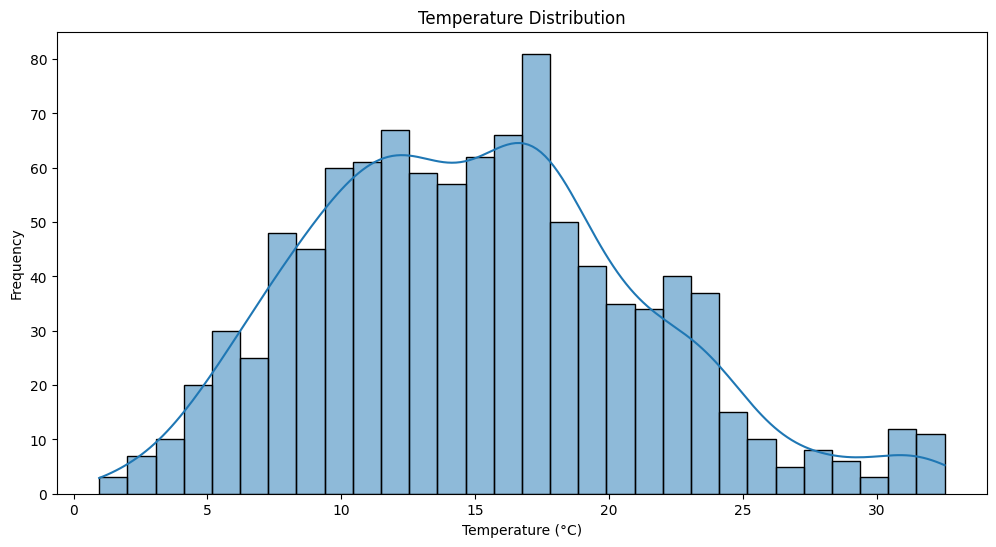

In [10]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Temperature (C)'], kde=True, bins=30)
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

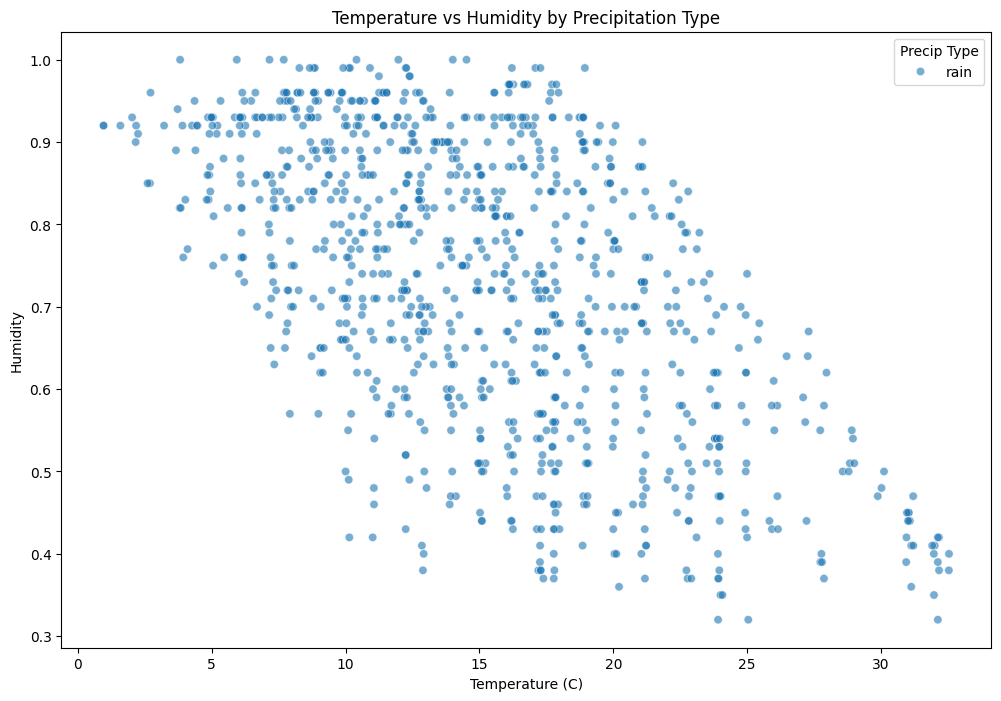

In [11]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Temperature (C)', y='Humidity', alpha=0.6, hue='Precip Type')
plt.title('Temperature vs Humidity by Precipitation Type')
plt.show()

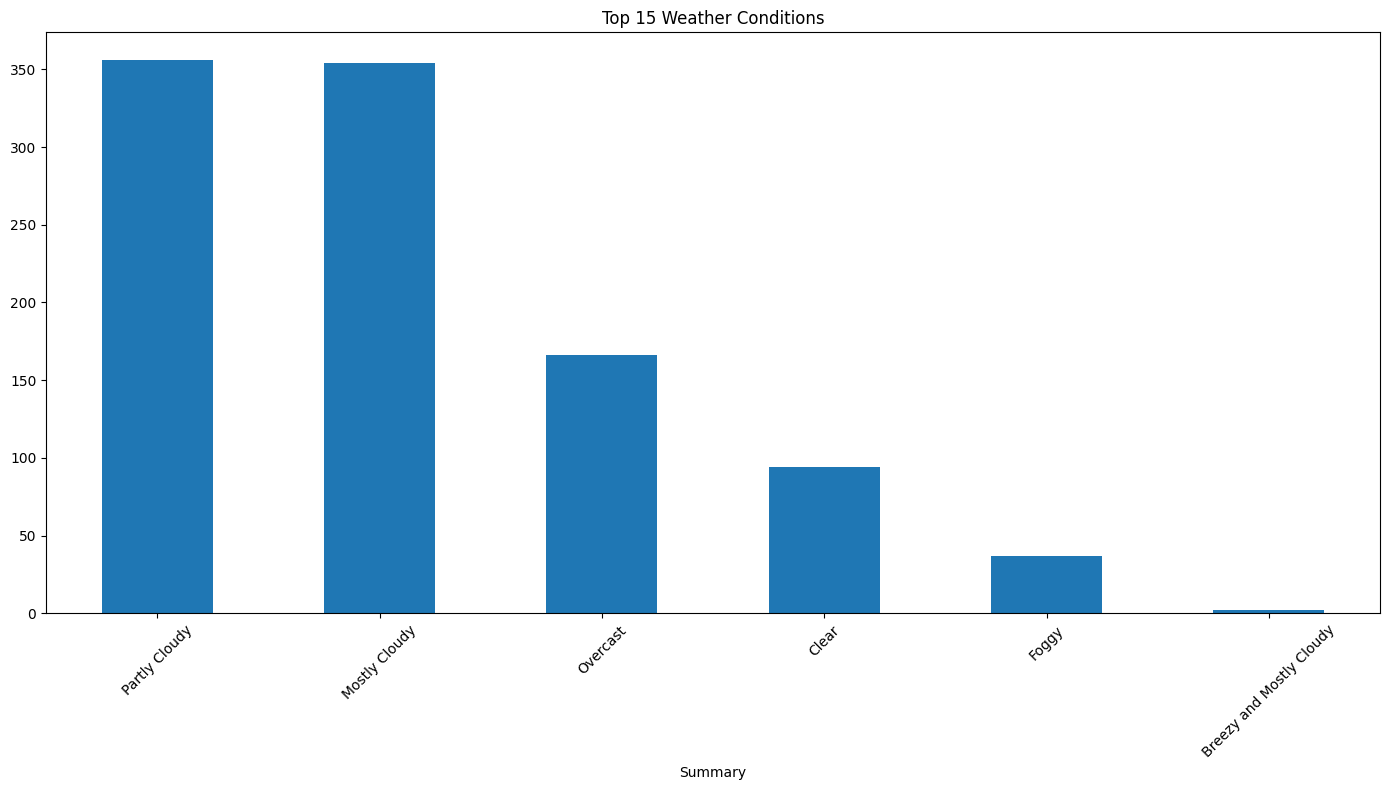

In [12]:
# Visualization 3: Weather Summary Count
plt.figure(figsize=(14, 8))
df['Summary'].value_counts().head(15).plot(kind='bar')
plt.title('Top 15 Weather Conditions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

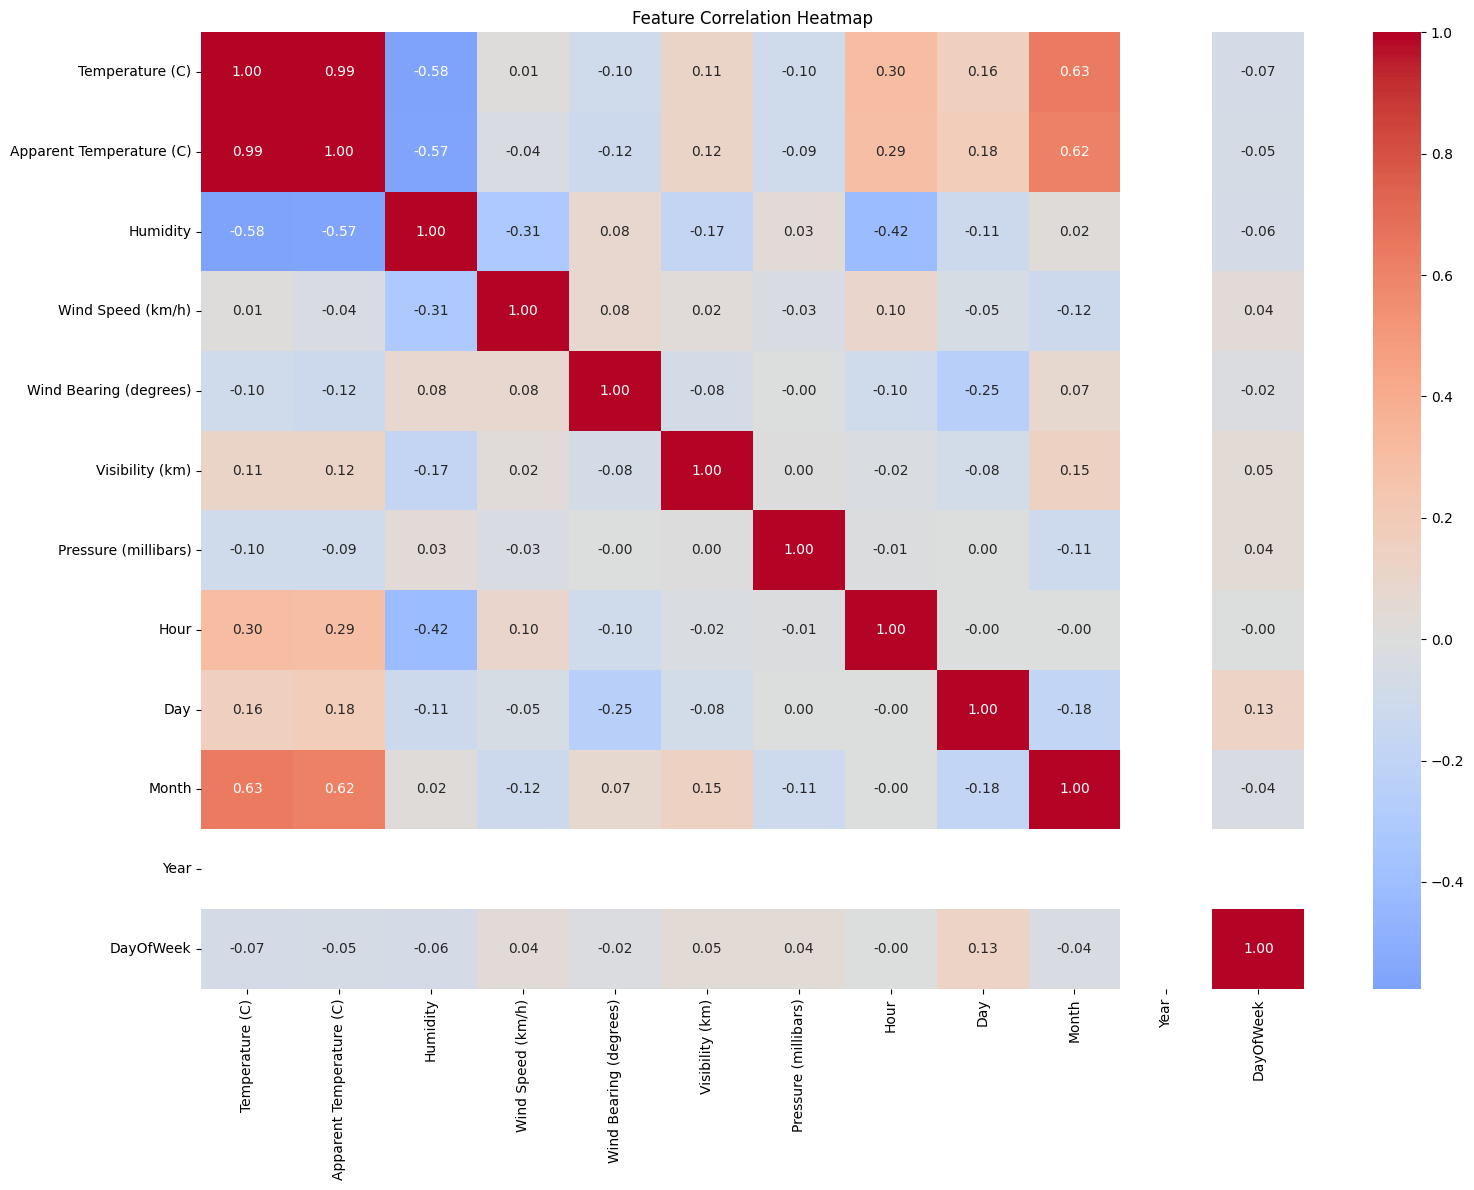

In [13]:
plt.figure(figsize=(16, 12))
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

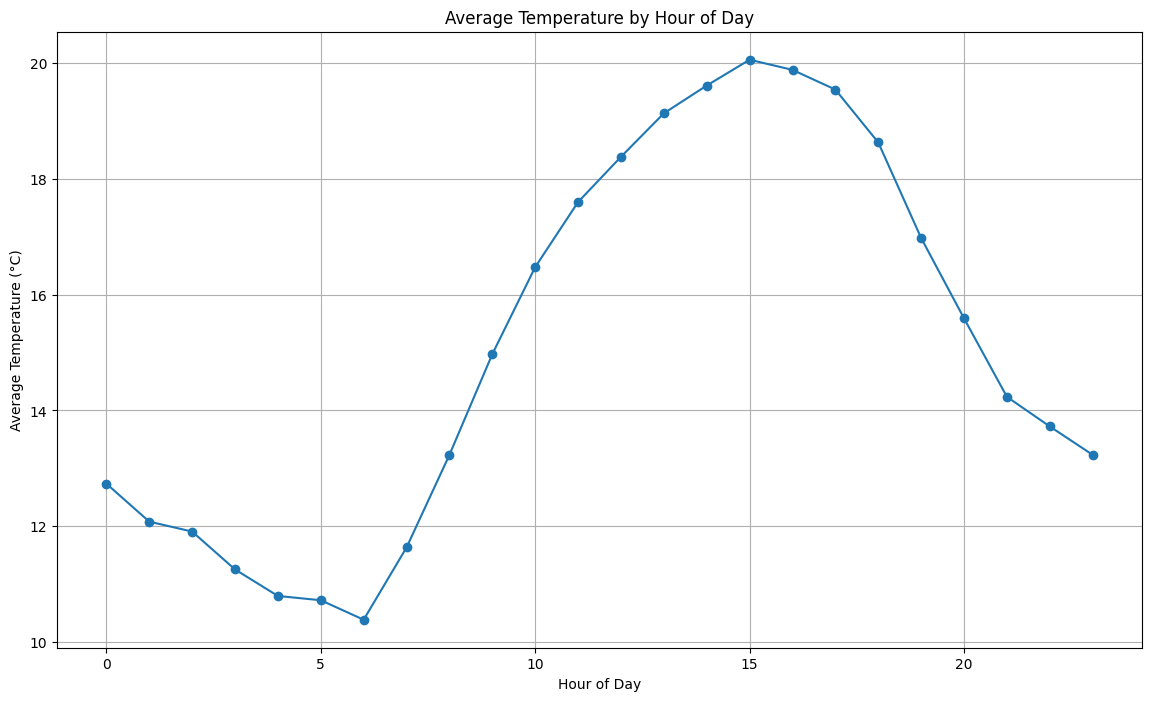

In [14]:
plt.figure(figsize=(14, 8))
df.groupby('Hour')['Temperature (C)'].mean().plot(kind='line', marker='o')
plt.title('Average Temperature by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Temperature (°C)')
plt.grid(True)
plt.show()

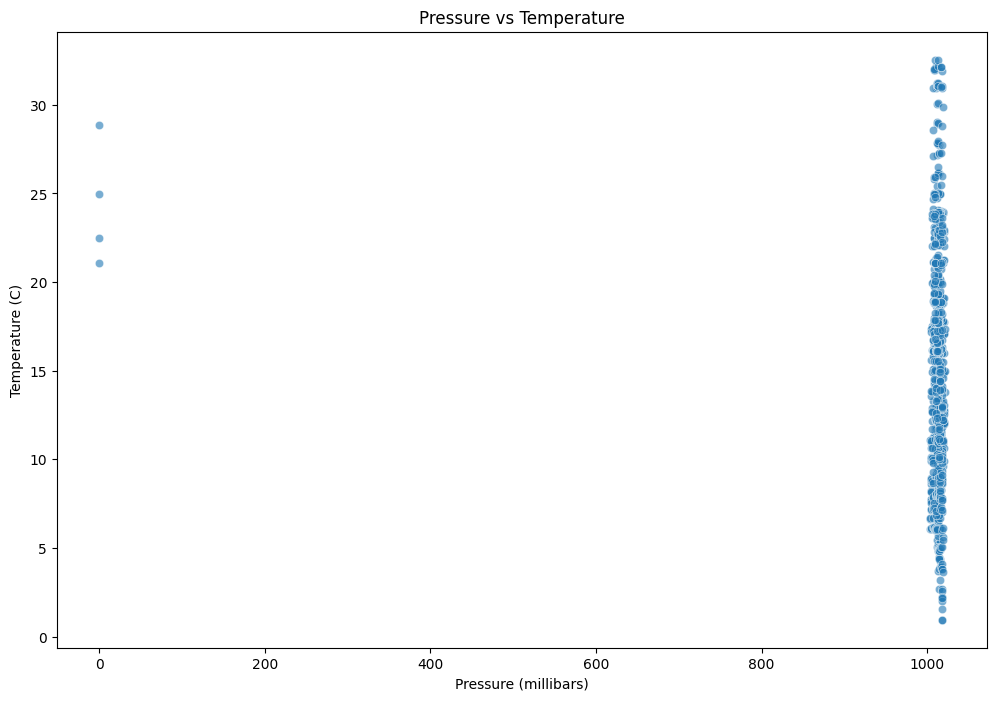

In [15]:
# Visualization 6: Pressure vs Temperature
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Pressure (millibars)', y='Temperature (C)', alpha=0.6)
plt.title('Pressure vs Temperature')
plt.show()

In [16]:
# Prepare data for machine learning
# Encode categorical variables
le_summary = LabelEncoder()
le_precip = LabelEncoder()

df['Summary_encoded'] = le_summary.fit_transform(df['Summary'])
df['Precip Type_encoded'] = le_precip.fit_transform(df['Precip Type'])

In [2]:
print("Categorical columns encoded successfully!")

Categorical columns encoded successfully!


In [17]:
# Select features
features = ['Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 
           'Visibility (km)', 'Pressure (millibars)', 'Hour', 'Day', 'Month',
           'Summary_encoded', 'Precip Type_encoded']

X = df[features]
y = df['Temperature (C)']

In [18]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")

Training set: (807, 10)
Testing set: (202, 10)


In [19]:
# Train Random Forest Model
model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [20]:
# Make predictions and evaluate
y_pred = model.predict(X_test)

In [21]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [22]:
print(f"Model Performance:")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Model Performance:
MSE: 1.6562
RMSE: 1.2869
R² Score: 0.9568


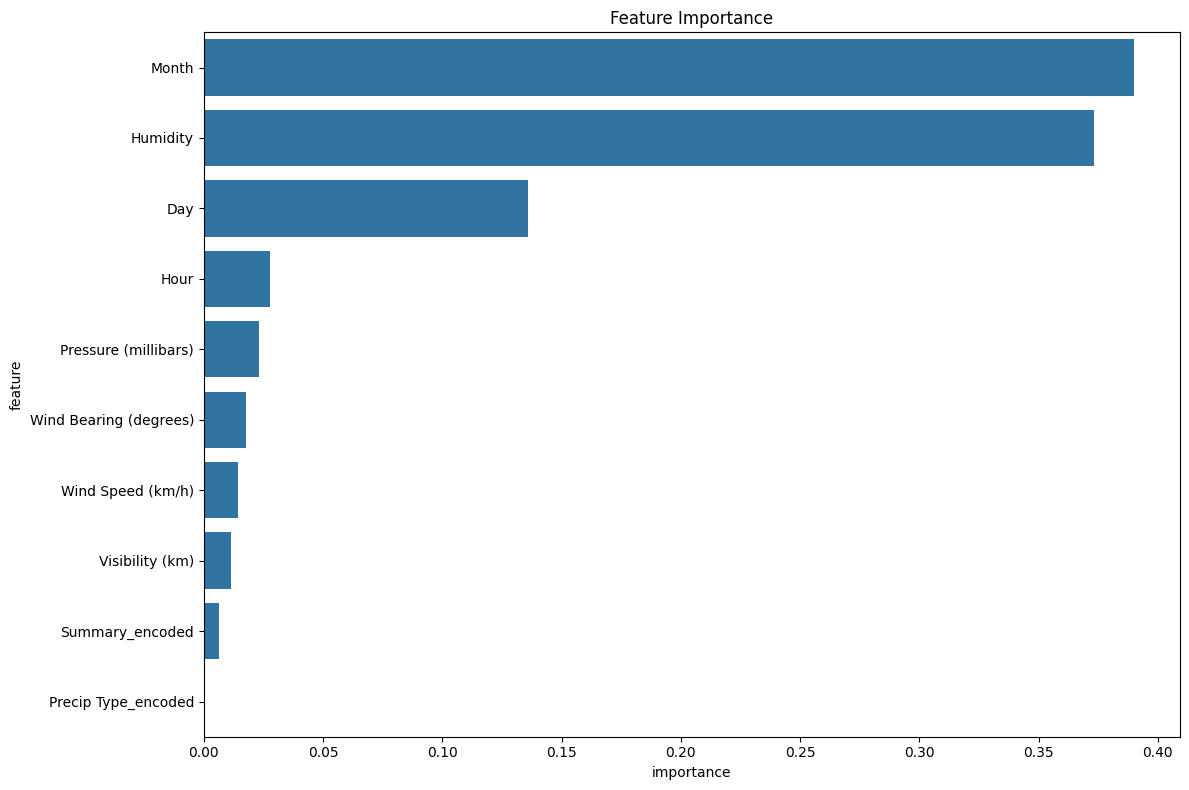

In [23]:
# Feature Importance
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

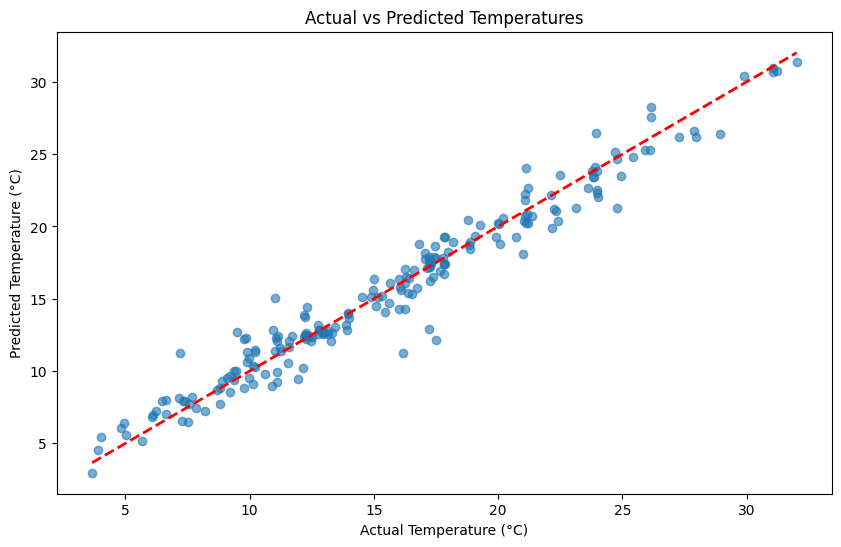

In [24]:
# Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Temperature (°C)')
plt.ylabel('Predicted Temperature (°C)')
plt.title('Actual vs Predicted Temperatures')
plt.show()

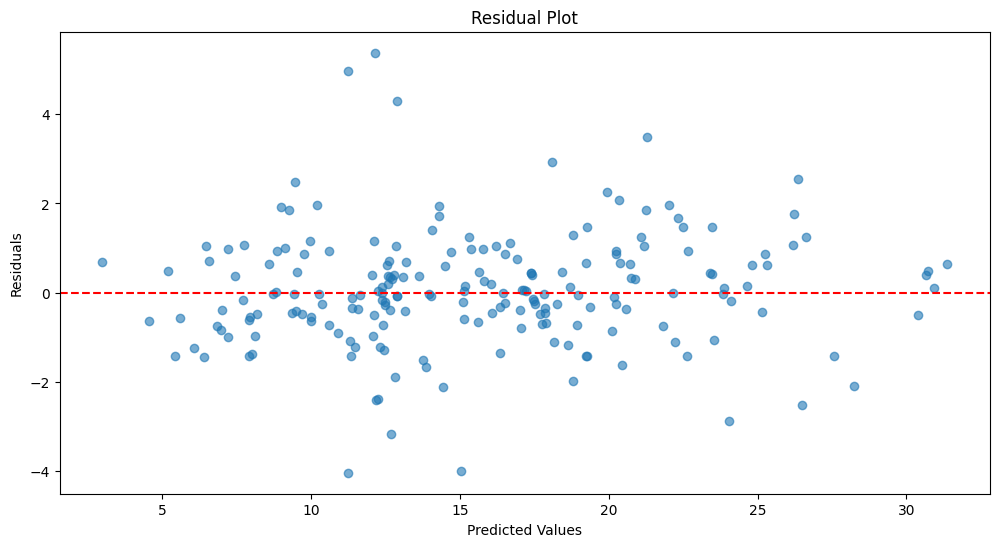

In [25]:
# Residual Analysis
residuals = y_test - y_pred
plt.figure(figsize=(12, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [26]:
# Save the model
import joblib
joblib.dump(model, 'weather_model.pkl')
joblib.dump(le_summary, 'label_encoder_summary.pkl')
joblib.dump(le_precip, 'label_encoder_precip.pkl')

print("Model and encoders saved successfully!")

Model and encoders saved successfully!


In [27]:
# Create sample prediction function
def predict_temperature(humidity, wind_speed, wind_bearing, visibility, pressure, 
                       hour, day, month, summary, precip_type):
    """Predict temperature based on input features"""
    
    # Encode categorical variables
    summary_encoded = le_summary.transform([summary])[0]
    precip_encoded = le_precip.transform([precip_type])[0]
    
    features = np.array([[humidity, wind_speed, wind_bearing, visibility, pressure,
                         hour, day, month, summary_encoded, precip_encoded]])
    
    prediction = model.predict(features)[0]
    return prediction

In [28]:
# Example prediction
sample_pred = predict_temperature(
    humidity=0.7,
    wind_speed=15.0,
    wind_bearing=180,
    visibility=10.0,
    pressure=1013.0,
    hour=14,
    day=15,
    month=4,
    summary='Partly Cloudy',
    precip_type='rain'
)

print(f"Predicted Temperature: {sample_pred:.2f}°C")

Predicted Temperature: 11.91°C
